EXPLORATORY DATA ANALYSIS

In [72]:
#!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [73]:
#read in dataset
df = pd.read_csv('/Users/karukavina/Documents/VSCODEFiles/ML/ML-Final-Project/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [74]:
# Data Cleaning and preprocessing- turning categorical data to quantative to make easier for some explorations

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

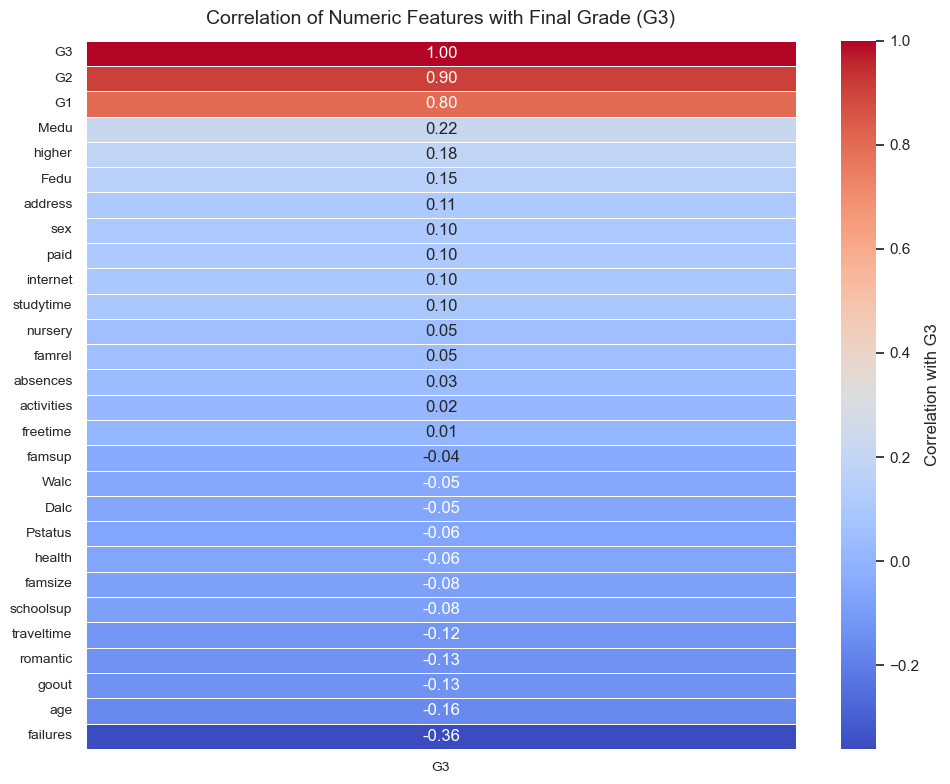

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include='number')

corr_sorted = numeric_df.corr(numeric_only=True)[['G3']].sort_values(by='G3', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
heatmap = sns.heatmap(
    corr_sorted,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation with G3'}
)
plt.title('Correlation of Numeric Features with Final Grade (G3)', fontsize=14, pad=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

In [76]:
#dropping G1 and G2 for rest of analysis since we know we want to drop these
df = df.drop(columns=['G1', 'G2'])

In [77]:
#shows us the basic statistics
df.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.777215,0.711392,0.896203,2.749367,2.521519,1.448101,2.035443,0.334177,...,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,...,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,0.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [78]:
#shows us variable data types
df.dtypes

sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G3                   int64
school_MS             bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_home           bool
reason_other          bool
r

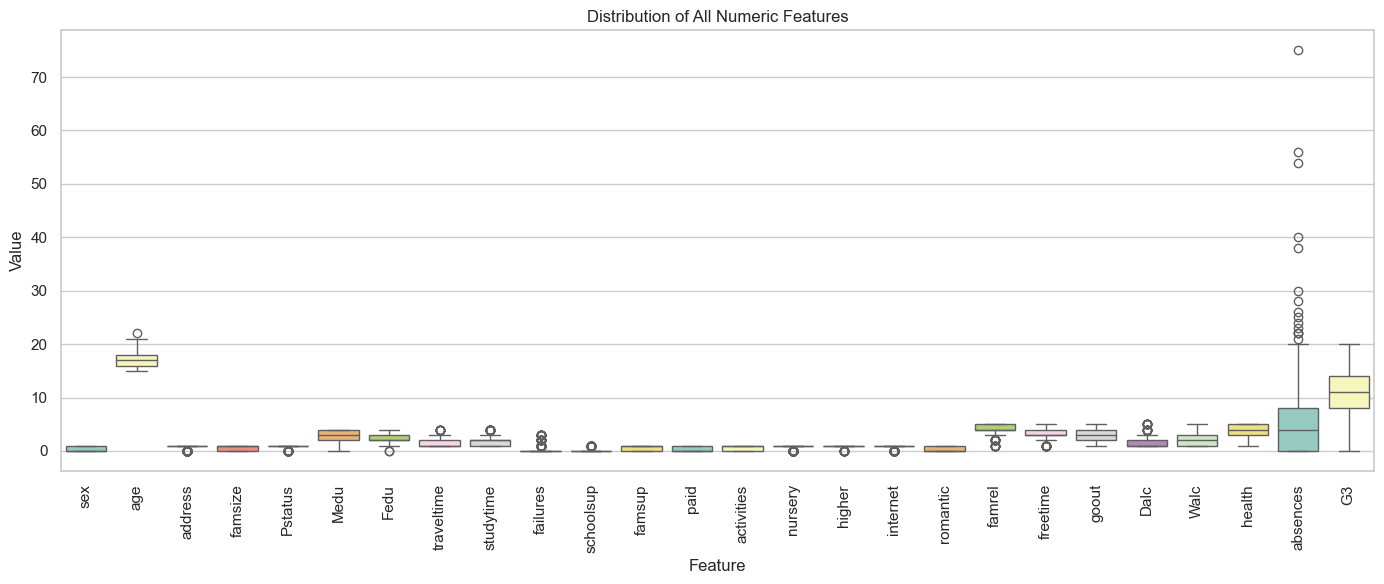

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#selects all numerical features
numeric_cols = df.select_dtypes(include='number').columns.tolist()

melted_all = df[numeric_cols].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(14, 6)) 
sns.boxplot(data=melted_all, x='Feature', y='Value', palette='Set3')
plt.xticks(rotation=90)
plt.title('Distribution of All Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


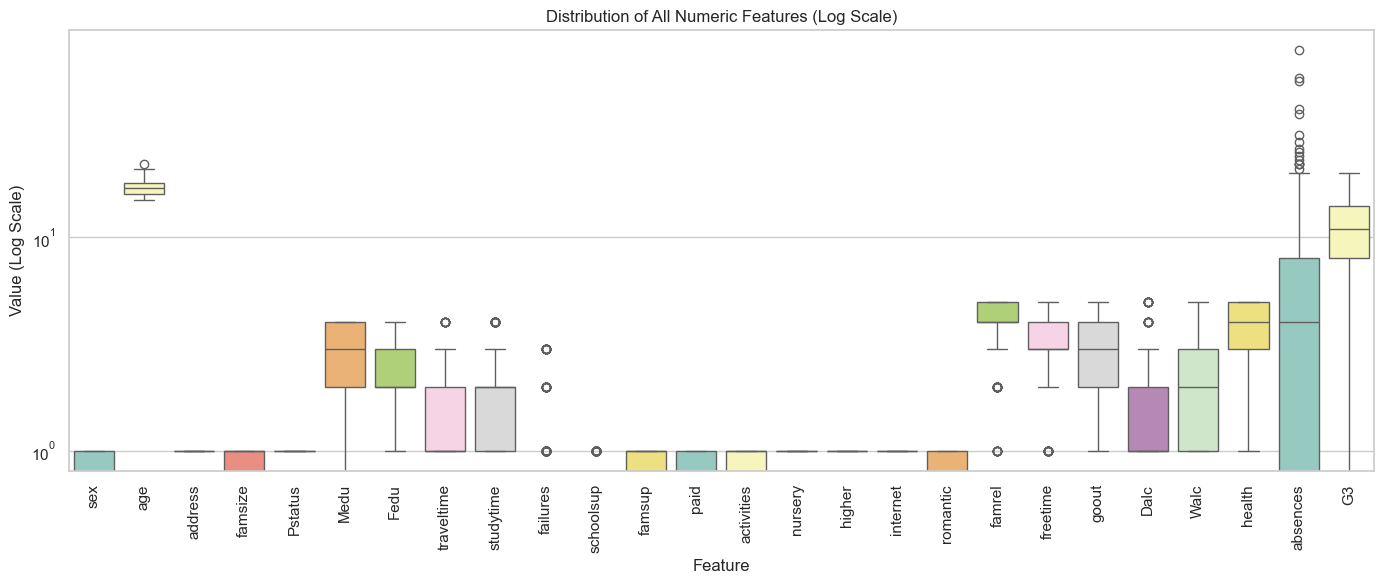

In [86]:
#using log scale in order to see data better for each boxplot

numeric_cols = df.select_dtypes(include='number').columns.tolist()

melted_all = df[numeric_cols].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_all, x='Feature', y='Value', palette='Set3')
plt.yscale('log')  # Set log scale for y-axis
plt.xticks(rotation=90)
plt.title('Distribution of All Numeric Features (Log Scale)')
plt.xlabel('Feature')
plt.ylabel('Value (Log Scale)')
plt.tight_layout()
plt.show()


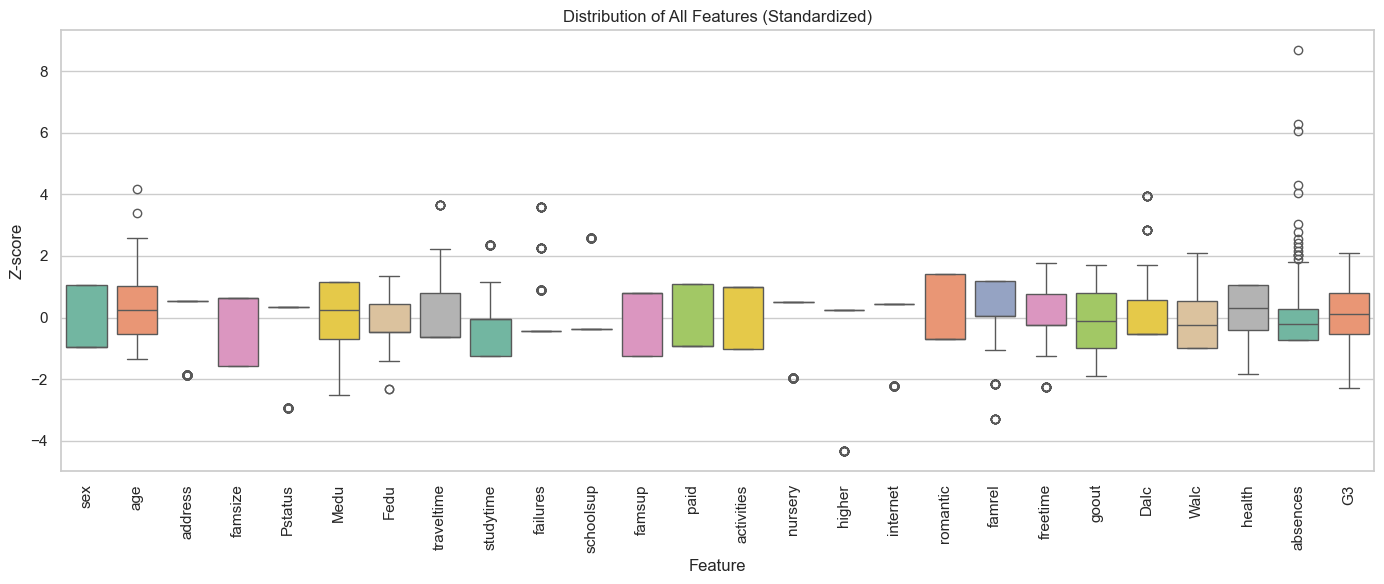

In [87]:
#compare to scaling the data
from sklearn.preprocessing import StandardScaler

normalized = pd.DataFrame(StandardScaler().fit_transform(df[numeric_cols]), columns=numeric_cols)

melted_norm = normalized.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_norm, x='Feature', y='Value', palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of All Features (Standardized)')
plt.xlabel('Feature')
plt.ylabel('Z-score')
plt.tight_layout()
plt.show()
